In [398]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.compose import make_column_selector as selector #Para seleccionar de forma automática las variables numéricas y categóricas
from sklearn.preprocessing import OneHotEncoder #Para codificar las variables categóricas usando dummies
from sklearn.preprocessing import StandardScaler #Para normalizar las variables numéricas
from sklearn.compose import ColumnTransformer #Modifica las columnas usando los preprocesadores
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline #Planifica una secuencia de procesos
from sklearn import set_config #Para mostrar graficamente el pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error


set_config(display='diagram')
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [399]:
houses_df = pd.read_csv('train.csv')

houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [400]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(houses_df.drop(['Id', 'SalePrice'], axis=1))
categorical_columns = categorical_columns_selector(houses_df)

print(numerical_columns)
print(categorical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCon

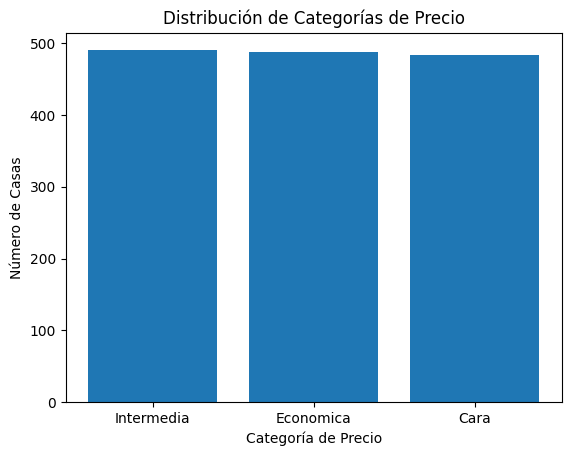

In [401]:
# Define the number of categories
num_categories = 3

# Define the category names
category_names = ['Economica', 'Intermedia', 'Cara']

# Create a new column in the DataFrame for the categories
houses_df['Precio_Categoria'] = pd.qcut(houses_df['SalePrice'], q=num_categories, labels=category_names)

# Verificar la distribución de las categorías
plt.bar(houses_df['Precio_Categoria'].value_counts().index, houses_df['Precio_Categoria'].value_counts().values)
plt.xlabel('Categoría de Precio')
plt.ylabel('Número de Casas')
plt.title('Distribución de Categorías de Precio')
plt.show()

In [402]:
preprocesador_categorico = OneHotEncoder(handle_unknown="ignore")
preprocesador_numerico = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

In [403]:
preprocesador = ColumnTransformer([
    ('Variables Categóricas',preprocesador_categorico, categorical_columns),
    ('Variables Numéricas',preprocesador_numerico, numerical_columns)
], remainder="passthrough")

In [404]:
modelo = make_pipeline(preprocesador,MLPClassifier(activation="relu",verbose=True,hidden_layer_sizes=(30, 20)))
modelo

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'E...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(30, 20), verbose=True))])

In [405]:
target = houses_df.pop('Precio_Categoria')
data = houses_df.drop(['Id', 'SalePrice'], axis=1)

In [406]:
random.seed(123)
data_train, data_test, target_train, target_test = train_test_split(data, target,test_size=0.3,train_size=0.7)
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

In [407]:
modelo.fit(data_train,target_train)

Iteration 1, loss = 1.19761783
Iteration 2, loss = 1.03727590
Iteration 3, loss = 0.93938326
Iteration 4, loss = 0.85933876
Iteration 5, loss = 0.78543060
Iteration 6, loss = 0.70331960
Iteration 7, loss = 0.62683766
Iteration 8, loss = 0.56544885
Iteration 9, loss = 0.51252303
Iteration 10, loss = 0.46800710
Iteration 11, loss = 0.43317123
Iteration 12, loss = 0.40204951
Iteration 13, loss = 0.37461154
Iteration 14, loss = 0.35477207
Iteration 15, loss = 0.33570554
Iteration 16, loss = 0.32263946
Iteration 17, loss = 0.31001547
Iteration 18, loss = 0.29799219
Iteration 19, loss = 0.28837448
Iteration 20, loss = 0.28001228
Iteration 21, loss = 0.27224311
Iteration 22, loss = 0.26418375
Iteration 23, loss = 0.25888734
Iteration 24, loss = 0.25169966
Iteration 25, loss = 0.25040972
Iteration 26, loss = 0.24313945
Iteration 27, loss = 0.23525913
Iteration 28, loss = 0.22964158
Iteration 29, loss = 0.22680136
Iteration 30, loss = 0.22090760
Iteration 31, loss = 0.21661673
Iteration 32, los

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'E...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(30, 20), verbose=True))])

In [408]:
pred = modelo.predict(data_test)

In [409]:
cm = confusion_matrix(target_test,pred)
accuracy=accuracy_score(target_test,pred)
precision =precision_score(target_test,pred,average='micro')
recall =  recall_score(target_test,pred,average='micro')
f1 = f1_score(target_test,pred,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)

Matriz de confusión
 [[123   0  13]
 [  0 134  24]
 [ 17  17 110]]
Accuracy:  0.8378995433789954
Precision:  0.8378995433789954
recall:  0.8378995433789954


In [410]:
modelo1 = make_pipeline(preprocesador,MLPClassifier(activation="identity",verbose=True,hidden_layer_sizes=()))

modelo1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'E...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='identity', hidden_layer_sizes=(),
                               verbose=True))])

In [411]:
modelo1.fit(data_train,target_train)

Iteration 1, loss = 1.37639516
Iteration 2, loss = 1.25564837
Iteration 3, loss = 1.15052665
Iteration 4, loss = 1.06193855
Iteration 5, loss = 0.98648644
Iteration 6, loss = 0.92156751
Iteration 7, loss = 0.86808429
Iteration 8, loss = 0.82239706
Iteration 9, loss = 0.78368704
Iteration 10, loss = 0.75123993
Iteration 11, loss = 0.72229100
Iteration 12, loss = 0.69840684
Iteration 13, loss = 0.67690402
Iteration 14, loss = 0.65832492
Iteration 15, loss = 0.64079162
Iteration 16, loss = 0.62535191
Iteration 17, loss = 0.61100572
Iteration 18, loss = 0.59786764
Iteration 19, loss = 0.58595370
Iteration 20, loss = 0.57473187
Iteration 21, loss = 0.56431148
Iteration 22, loss = 0.55582641
Iteration 23, loss = 0.54619297
Iteration 24, loss = 0.53685621
Iteration 25, loss = 0.52829179
Iteration 26, loss = 0.52203848
Iteration 27, loss = 0.51488971
Iteration 28, loss = 0.50710950
Iteration 29, loss = 0.50071687
Iteration 30, loss = 0.49373620
Iteration 31, loss = 0.48766962
Iteration 32, los

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'E...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='identity', hidden_layer_sizes=(),
                               verbose=True))])

In [412]:
pred1 = modelo1.predict(data_test)

In [413]:
cm = confusion_matrix(target_test,pred1)
accuracy=accuracy_score(target_test,pred1)
precision =precision_score(target_test,pred1,average='micro')
recall =  recall_score(target_test,pred1,average='micro')
f1 = f1_score(target_test,pred1,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)

Matriz de confusión
 [[119   0  17]
 [  0 124  34]
 [ 18  23 103]]
Accuracy:  0.7899543378995434
Precision:  0.7899543378995434
recall:  0.7899543378995434


## Obteniendo la variable respuesta SalePrice

In [414]:
houses_df = pd.read_csv('train.csv')
y = houses_df.pop("SalePrice")
X = houses_df
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [415]:
preprocesador_categorico = Pipeline(steps=[("encoder", OneHotEncoder(handle_unknown="ignore")), ("imputer", SimpleImputer(strategy="median"))]
)
preprocesador_numerico = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

In [416]:
preprocesador = ColumnTransformer([
    ('Variables Categóricas',preprocesador_categorico, categorical_columns),
    ('Variables Numéricas',preprocesador_numerico, numerical_columns)
], remainder="passthrough")

In [417]:
random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [418]:
y_train

956     124000
848     240000
1165    233170
791     146800
1333    125500
         ...  
922     169990
1437    394617
1092    136500
1368    144000
1425    142000
Name: SalePrice, Length: 1021, dtype: int64

In [419]:
model = make_pipeline(preprocesador, MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10))

model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   '...
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpregressor', MLPRegressor(hidden_layer_sizes=(100, 50)))])

In [420]:
# Ajustar el modelo
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   '...
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpregressor', MLPRegressor(hidden_layer_sizes=(100, 50)))])

In [421]:
pred1 = model.predict(X_test)

In [422]:
mse = mean_squared_error(y_test, pred1)
print("MSE (test):", mse)
mae_test = mean_absolute_error(y_test, pred1)
print("MAE (test):", mae_test)
rmse_test = np.sqrt(mse)
print("RMSE (test):", rmse_test)

MSE (test): 7047641407.365252
MAE (test): 61123.99523275538
RMSE (test): 83950.23172907416


# Modelo 2 SalePrice

In [423]:
model1 = make_pipeline(preprocesador, MLPRegressor(hidden_layer_sizes=(100, 50), activation='logistic', solver='adam', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.0002, max_iter=500, shuffle=True, random_state=None, tol=0.0001, verbose=True, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-20, n_iter_no_change=10))
model1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   '...
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpregressor',
                 MLPRegressor(activation='logistic', alpha=0.001, epsilon=1e-20,
                              hidden_layer_sizes=(100, 50),
                              learning_rate_init=0.0002, max_iter=500,
                              verbose=True))])

In [424]:
# Ajustar el modelo
model1.fit(X_train, y_train)

Iteration 1, loss = 19472995514.30292130
Iteration 2, loss = 19472975457.11344147
Iteration 3, loss = 19472955823.49551392
Iteration 4, loss = 19472936408.94477463
Iteration 5, loss = 19472916415.70910263
Iteration 6, loss = 19472895572.45768738
Iteration 7, loss = 19472873991.34129715
Iteration 8, loss = 19472852448.91053772
Iteration 9, loss = 19472831410.37177658
Iteration 10, loss = 19472810738.12526703
Iteration 11, loss = 19472787642.94616318
Iteration 12, loss = 19472764725.39554214
Iteration 13, loss = 19472741306.50082016
Iteration 14, loss = 19472714310.95662689
Iteration 15, loss = 19472687377.14677811
Iteration 16, loss = 19472662611.54225159
Iteration 17, loss = 19472635193.59914017
Iteration 18, loss = 19472603119.44125366
Iteration 19, loss = 19472573188.38195038
Iteration 20, loss = 19472547913.51048660
Iteration 21, loss = 19472522585.96188736
Iteration 22, loss = 19472502100.28830338
Iteration 23, loss = 19472485351.95871735
Iteration 24, loss = 19472467927.85107803
I

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   '...
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpregressor',
                 MLPRegressor(activation='logistic', alpha=0.001, epsilon=1e-20,
                              hidden_layer_sizes=(100, 50),
                              learning_rate_init=0.0002, max_iter=500,
                              verbose=True))])

In [425]:
pred2 = model1.predict(X_test)

In [426]:
mse = mean_squared_error(y_test, pred1)
print("MSE (test):", mse)
mae_test = mean_absolute_error(y_test, pred1)
print("MAE (test):", mae_test)
rmse_test = np.sqrt(mse)
print("RMSE (test):", rmse_test)

MSE (test): 7047641407.365252
MAE (test): 61123.99523275538
RMSE (test): 83950.23172907416
